# Lecture 4 Geometric Transformations

<br>

<b>A geometric transformation converts an image by rearranging the location of the pixels</b><br><br>

<b>A couple of simple examples are a linear shift or a rotation</b><br><br>

<b>This section discusses the theory of geometric transformation functions and methods by which they can be achieved using Python functions</b><br><br>

<b>Some of the functions are provided by scipy.ndimage while others are constructed from basic principles or other libraries</b><br><br>

<b>The most basic geometric operations are to extract a subimage from a larger image or to create a larger image from a set of smaller images</b><br><br>

<br><br>

<b>The Window operator extracts a subimage from the original</b><br><br>

<b>Usually this will be a rectangular region defined by opposing corners $\vec v_1$ and $\vec v_2$</b><br><br>

<b>However, other applications may require the user to define the shape of the window</b><br><br>

<b>The Window operator is denoted by $\Box_{\vec v_1, \vec v_2} $ and returns an image that is smaller in size than the original</b><br><br>

<b>The opposite of the Window operator is the Plop (we can use the crop function) operator which places a smaller image inside of a larger frame</b><br><br>

<b>The size of this frame is defined by the vector $\vec w$</b><br><br>

<br><br>

<b>The Plop operator is denoted by $U_{\vec w}$, and places the smaller image in the center of a larger frame </b><br><br>

<b>Consider a small example which starts with the image in in the code below</b><br><br>

<b>The task is simply to cut out a rectangular region around the clock and paste that into a new image that is the same size as the original</b><br><br>

<b>Given a color image ${\bf a}[\vec x]$, the notation to apply a Window and then a Plop is</b><br><br>

${\bf b}[\vec x] = U_{\vec w} \Box_{\vec v_1, \vec v_2}  \mathcal{L}_L  {\bf a}[\vec x]$

<b>where $\vec v_1$ and $\vec v_2$ define the opposing corners of the cutout region and $\vec w$ defines the output frame size</b><br><br>

<br><br>


Original image


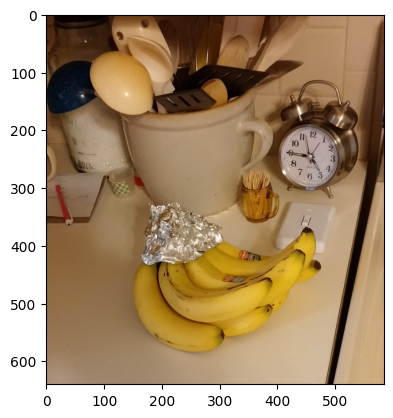


Cropped image


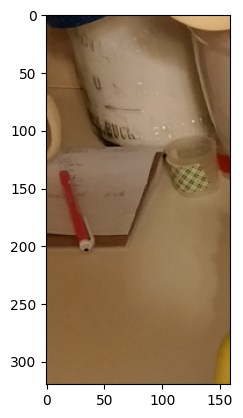


Clock portion of image


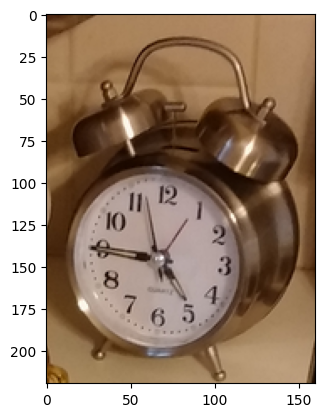


Clock portion of image plopped into large window


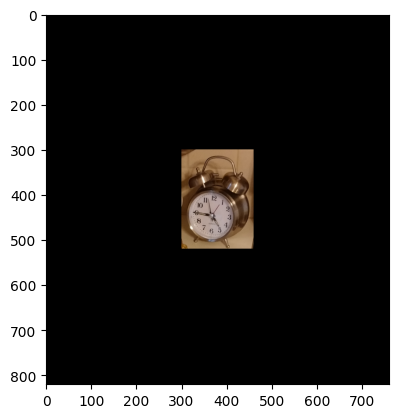

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
from PIL import Image
from PIL import ImageOps
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/bananas.png'
amg = Image.open(urlopen(url))

# Setting the points for cropped image
width, height = amg.size
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
bmg = amg.crop((left, top, right, bottom))

clock = amg.crop((390, 100, 550, 320))

print('\nOriginal image')
plt.imshow(amg)
plt.show()

print('\nCropped image')
plt.imshow(bmg)
plt.show()

print('\nClock portion of image')
plt.imshow(clock)
plt.show()

#  plop image into a larger frame
img_with_border = ImageOps.expand(clock, border=300, fill='black')
print('\nClock portion of image plopped into large window')
plt.imshow(img_with_border)
plt.show()


<br><br><br><br>

<b>The Downsample operator extracts rows and/or columns according to a user formulation</b><br><br>

<b>For instance this operator can be use to extract every second row or every third column</b><br><br>

<b>Actually, the user can define any pattern and just denote this pattern with a user-defined subscript to the operator $\Downarrow$</b><br><br>

<br><br>

<b>Consider a very simple example starting with the image we create below</b><br><br>

<b>This image is created by adding 1 to every pixel in each even numbered row and again adding 1 to each even numbered column</b><br><br>

<b>Thus, any pixel that is located on an even numbered row and column has a value of 2, any pixel on an odd row and column has a value of 0, and all other pixels have a value of 1</b><br><br>

<br><br>

<b>The goal is to reorganize the pixels to the new arrangement shown below</b><br><br>

<b>This is accomplished by creating a new image from downsampling and concatenation processes</b><br><br>

<b>Four smaller images are created from downsampling the input and then these are arranged through concatenation</b><br><br>

T<b>he first image is created by</b><br><br>

${\bf b}[\vec x] = \Downarrow_{w_1} \mathcal{L}_L {\bf a}[\vec x]$

<b>The $\mathcal{L}_L$ operator converts the image to grayscale and the $\Downarrow_{w_1}$ function downsamples the image according to the prescription defined as $w_1$</b><br><br>

<b>In this case, $w_1$ is defined as gather only those pixels that are on even numbered rows and even numbered columns</b><br><br>

<b>Basically, it is extracting data from every other row and every other column</b><br><br>

<b>The other images are obtained by</b><br><br>

$\mathbf{c}[\vec{x}]=\downarrow_{w_{2}} \mathcal{L}_{L} \mathbf{a}[\vec{x}]$<br>

$\mathbf{d}[\vec{x}]=\downarrow_{w_{3}} \mathcal{L}_{L} \mathbf{a}[\vec{x}]$<br>

$\mathbf{f}[\vec{x}]=\downarrow_{w_{4}} \mathcal{L}_{L} \mathbf{a}[\vec{x}]$<br>

<b>The prescription $w_2$ extracts pixels from the odd numbered rows and the even numbered columns</b><br><br>

<b>The $w_3$ extracts pixels from the even numbered rows and the odd numbered columns</b><br><br>

<b>Finally, the $w_4$ prescribes the extraction of pixels from odd numbered rows and odd numbered columns</b><br><br>

<b>The next step is to use the Concatenate operator to create a larger image from these newly created smaller images</b><br><br>

<b>The first step is to create a new image from stacking ${\bf b}[\vec x]$ and ${\bf c}[\vec x]$ vertically as in</b><br><br>

${\bf g}[\vec x] = \mathcal{C}_V \{ \bf{b}[\vec x], {\bf c}[\vec x] \}$

<b>This is repeated to create another image that stacks ${\bf d}[\vec x]$ and ${\bf f}[\vec x]$</b><br><br>

${\bf h}[\vec x] = \mathcal{C}_V \{ \bf{d}[\vec x], {\bf f}[\vec x] \}$

<b>Finally, these two images are concatenated in the horizontal direction to form the final image</b><br><br>

${\bf m}[\vec x] = \mathcal{C}_H \{ \bf{g}[\vec x], {\bf h}[\vec x] \}$

<br><br>

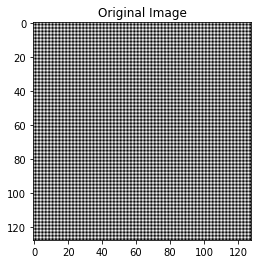

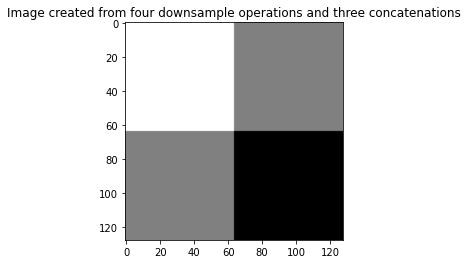

In [ ]:
#  simple example
import numpy as np
V, H = [128, 128]

data = np.zeros((128,128))
data[0:128:2] = 1
data[:,:128:2] += 1

plt.title('Original Image')
plt.imshow(data, cmap='gray')
plt.show()

b = data[0:V:2,0:H:2]
c = data[1:V:2,0:H:2]
d = data[0:V:2,1:H:2]
f = data[1:V:2,1:H:2]
g = np.concatenate((b,c))
h = np.concatenate((d,f))
m = np.concatenate((g,h),1)

plt.title('Image created from four downsample operations and three concatenations')
plt.imshow(m, cmap='gray')
plt.show()

<br><br><br><br>

## Linear Translation

<br>

<b>One of the simplest interpolations is a linear shift in which all of the pixels are moved in the vertical and/or horizontal directions</b><br><br>

<b>Problems that arise from shifting are that some pixels will become undefined, and in the cases where the shift includes fractions of pixel widths, an estimation of pixel intensity values may be required</b><br><br>

<br><br>

### Shift Sampling

<br>

<b>The shift vector, $\vec v$, moves the information en masse to a new location</b><br><br>

<b>When an image is shifted then part of the information moves out of the frame and pixels on the other side of the frame are undefined</b><br><br>

<b>For example, if an image is shifted to the right then the rightmost columns will leave the frame while the leftmost columns are not defined</b><br><br>

<b>For now, those undefined pixels are set to 0</b><br><br>

<br><br>

<b>The Shift operator is formally defined as</b><br><br>

${\bf b}[\vec x] = D_{\vec v} {\bf a}[\vec x] = {\bf a}[\vec x - \vec v]$

<b>The scipy package provides the function ndimage.shift which translates the information within an image</b><br><br>

<b>The example that follows demonstrates this operation</b><br><br>

<b>The first shift moves the image 10 pixels in the vertical direction and 25 pixels in the horizontal direction</b><br><br>

<b>The operator notation is</b><br><br>

${\bf b}[\vec x ] = D_{\vec v} \mathcal{L}_L {\bf a}[\vec x]$

<br><br>

<b>The second shift sets the undefined pixels values to 0</b><br><br>

<b>This can be controlled via the parameter cval to set a specified value</b><br><br>

<b>The operator includes an optional term that defines the values for undefined pixels or the wrap-around</b><br><br>

<b>It is the $b$ term in</b><br><br>

${\bf c}[\vec x ] = D_{\vec v, b} {\bf a}[\vec x]$

<br><br>

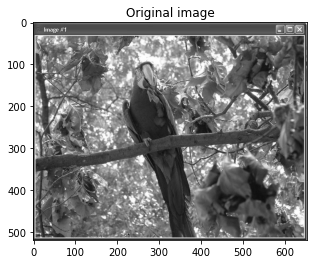

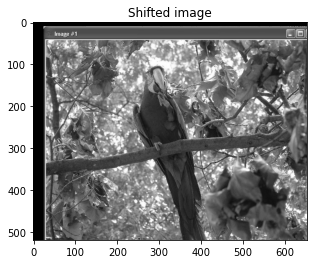

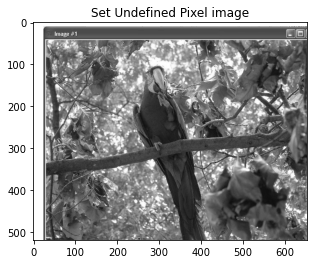

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
amg = imageio.imread(url, as_gray=True)

plt.title('Original image')
plt.imshow(amg, cmap='gray')
plt.show()

bdata = nd.shift(amg, (10,25))  #  move the image 10 pixels in the vertical direction and 25 pixels in the horizontal direction
cdata = nd.shift(amg, (10,25), cval=255)  #  set the undefined pixels to a specified value with cval

plt.title('Shifted image')
plt.imshow(bdata, cmap='gray')
plt.show()

plt.title('Set Undefined Pixel image')
plt.imshow(cdata, cmap='gray')
plt.show()


<br><br><br><br>

## Noninteger Shifts

<br>

<b>The previous section shifted images by integer amounts, whereas shifting an image by a non-integer amount requires a bit more care</b><br><br>

<b>Pixels are not points in space but rather are rectangular regions $v_p \times h_p$</b><br><br>

<b>If the image is shifted by an amount $nv_p, mh_p$ where $m$ and $n$ are integers, then the rectangular pixels align with the rectangular grid of the original image</b><br><br>

<br><br>

<b>In a noninteger shift, the pixels no longer align with the grid</b><br><br>

<b>A good approach solving this problem is to use smoothing or spline fits to estimate the value for each rectangular grid</b><br><br>

<b>The function ndimage.shift does this estimation and the order of the spline is controlled by the value order which has a default value of 3</b><br><br>

<b>To determine the effect of this order, two copies of an input image ${\bf a}[\vec x]$ were shifted by the same amount but with a different order value</b><br><br>

<b>These were then subtracted and the average of the magnitude of the resultant pixels was computed</b><br><br>

<b>The nonzero result indicates that there is a difference between the two values but the magnitude of the result is small indicating that the difference is not very significant in this example</b><br><br>

<br><br>

<b>In operator notation</b><br><br>

$\chi = \mathcal{M} \biggl| D_1 {\bf a}[\vec x] - D_2 {\bf a}[\vec x] \biggr|$

<b>where $D_1$ represents a shift with order = 1 and $D_2$ represents the same shift with order = 2</b><br><br>

<b>The average of the absolute value of the subtraction is represented by $\mathcal{M}$</b><br><br>

<b>The answer $\chi$ is a scalar that is the average difference between the pixels from the two shifted images</b><br><br>

<b>A nonzero value indicates that there are differences between the two shifted images due to the order of their estimations</b><br><br>

<br><br>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
amg = imageio.imread(url, as_gray=True)

m2 = nd.shift(amg, (20.5,0), order=1)
m1 = nd.shift(amg, (20.5,0), order=2)
mShift = abs(m1-m2).mean()
print('\nMean shift:', mShift)



Mean shift: 1.6366986


<br><br><br><br>

### Scaling

<br>

<b>Scaling increases or decreases the spatial extent of the image</b><br><br>

<b>If, for example, the image were scaled by a factor of 2 then it would use twice as many pixels in each dimension to contain the information</b><br><br>

<b>The scaling operation is defined as</b><br><br>

${\bf c}[ \vec x] = S_m {\bf a}[ \vec x]$

<b>where $S_m$ is the scaling operator and $m$ is the magnitude of the scaling</b><br><br>

<b>If $m$ is a scalar then the scaling is the same in all dimensions</b><br><br>

<b>Of course, it is possible to scale each dimension differently by placing the different scaling factors along the diagonal of a matrix <b>D </b> and employing</b><br><br>

${\bf c}[ \vec x] = {\bf a}[ {\bf D} \vec x]$

<b>The function scipy.ndimage.zoom performs the scaling functions</b><br><br>

<br><br>

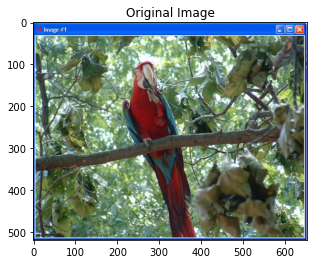


Image shape: (519, 653, 3)

Image shape scaled to: (1038, 1306, 3)


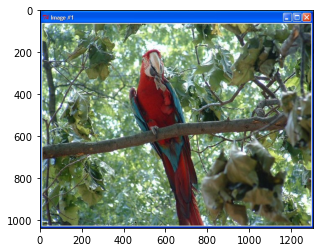


Image shape scaled to: (260, 588, 3)


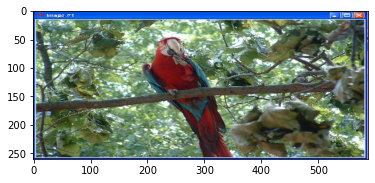

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
data = imageio.imread(url)

plt.title('Original Image')
plt.imshow(data)
plt.show()

print('\nImage shape:', data.shape)

ata2 = nd.zoom(data, (2,2,1))
print('\nImage shape scaled to:', ata2.shape)
plt.imshow(ata2)
plt.show()

data2 = nd.zoom(data, (0.5,0.9,1))
print('\nImage shape scaled to:', data2.shape)
plt.imshow(data2)
plt.show()


<br><br><br><br>

### Rotation

<br>

<b>The Rotation operator also moves pixels to a new location</b><br><br>

<b>Formally, the rotation of vector $\vec x$ is described by</b><br><br>

$\vec y = {\bf R}\vec x$

<b>where, ${\bf R}$ is the rotation matrix</b><br><br>

$\begin{equation}\label{eq:rotmat}
{\bf R} = \left[ {\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta & \cos\theta
\end{array}
} \right]
\end{equation}$

<b>and $\theta$ is the angle of rotation</b><br><br>

<b>To rotate an image, the coordinate of each pixel is considered as an input</b><br><br>

<b>In operator notation it is represented by</b><br><br>

${\bf b}[\vec x] = \mathcal{R}_{\theta;\vec v} {\bf a}[\vec x]$

<b>where the $\mathcal{R}$ is the rotation operator, $\theta$ is the rotation angle (where CCW is positive) and $\vec v$ is an optional argument that places the center of rotation someplace other than the center of the frame</b><br><br>

<b>Note in the example below what happends to the image when reshape is False, the frame size remains the same as the original and the corners of the original image are off the frame</b><br><br>

<br><br>

<ipython-input-5-6d884a8e1c74>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(url)


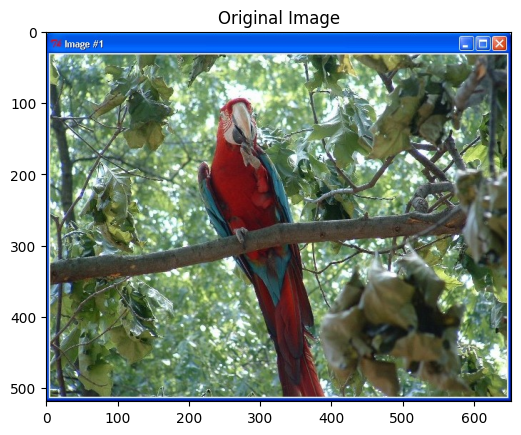

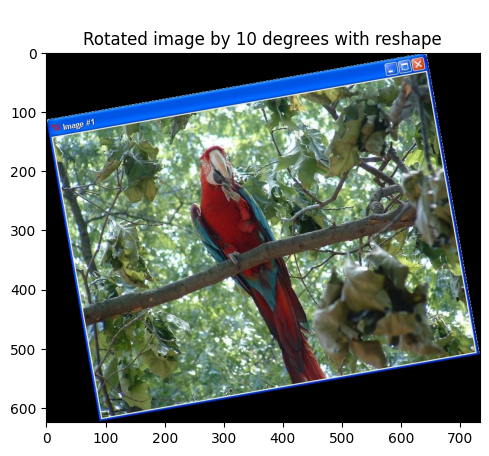

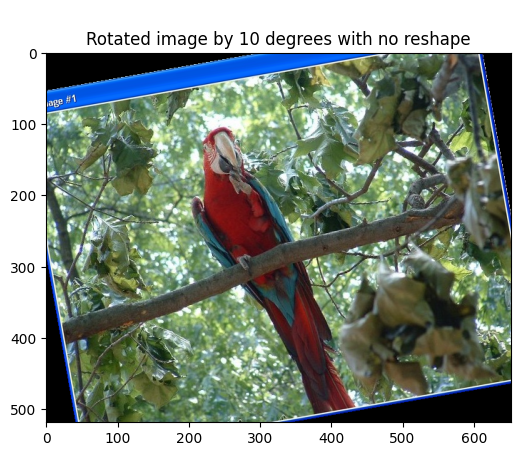

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
data = imageio.imread(url)

plt.title('Original Image')
plt.imshow(data)
plt.show()

data2 = nd.rotate(data, 10, reshape=True)
plt.title('\nRotated image by 10 degrees with reshape')
plt.imshow(data2)
plt.show()

data2 = nd.rotate(data, 10, reshape=False)
plt.title('\nRotated image by 10 degrees with no reshape')
plt.imshow(data2)
plt.show()

<br><br><br><br>

<b>Rotations are not perfect in that a small amount of information is lost during the estimation of the pixel values</b><br><br>

<b>Consider the following process</b><br><br>

${\bf b}[\vec x] = \Box_{\vec v_1, \vec v_2} \mathcal{R}_{-\theta} \mathcal{R}_{+\theta} {\bf a}[\vec x]$

<b>where $\theta$ is a user-defined angle and $\vec v_1$ and $\vec v_2$ define the a rectangular region in ${\bf a}[\vec x]$ that is centered in the frame</b><br><br>

<b>Since the $\mathcal{R}$ changes the size of the frame, the $\Box_{\vec v_1, \vec v_2}$ operator is used to extract a sub-image that is the same size as the original image</b><br><br>

<b>If there are no errors in the rotation algorithm then the ${\bf b}[\vec x] = {\bf a}[\vec x]$ should be true </b><br><br>

<br><br>

<b>Now consider repetitive rotations of a small angle as in</b><br><br>

${\bf b}[\vec x] = \Box_{\vec v_1, \vec v_2} \mathcal{R}^n_{-\theta} \mathcal{R}^n_{+\theta} {\bf a}[\vec x]$

<b>where the superscript $n$ indicates that the process is repeated $n$ times</b><br><br>

<b>In this example, $\theta = 1^\circ$ and $n = 25$</b><br><br>

<b>Again if there were no errors in the rotation process then ${\bf b}[\vec x] = {\bf a}[\vec x]$ would be true</b><br><br>

<b>The image $| {\bf b}[\vec x] - {\bf  a}[\vec x] |$ is shown below with the intensity inverted so that the dark pixels represent the largest values</b><br><br>

<b>Obviously, errors do exist</b><br><br>

<br><br>

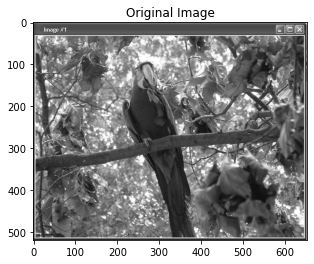

(519, 653)


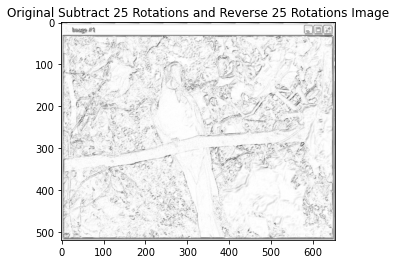

In [ ]:
#(183, 275, 3)  left, top, right, bottom
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
data = imageio.imread(url, as_gray=True)

m2 = data
for i in range(25):  #  rotate in one direction by 1 degree 25 times
    m2 = nd.rotate(m2, 1, reshape=True)
for i in range(25):  #  rotate in the opposite direction by 1 degree 25 times
    m2 = nd.rotate(m2, -1, reshape=True)

plt.title('Original Image')
plt.imshow(data, cmap='gray')
plt.show()

cut = m2[415:415+519, 377:377+653]  #  window operation
print(cut.shape)

answ = abs(cut-data)

#  note that this a crude form of edge detection
plt.title('Original Subtract 25 Rotations and Reverse 25 Rotations Image')
plt.imshow(-answ, cmap='gray')
plt.show()


<br><br><br><br>

### Dilation and Erosion

<br>

<b>The dilation and erosion operators are often used to fill in holes and remove single pixel noise</b><br><br>

<b>The dilation operator replaces pixel $a_{i,j}$ with the maximum value of its immediate neighbors</b><br><br>

$b_{i,j} = \max_{k,l} ( a_{k,l}; k=i-1,i,i+1; l=j-1,l,l+1)$  

<b>Likewise the  erosion operator replaces pixel $a_{i,j}$ with the minimum value of its immediate neighbors</b><br><br>

$b_{i,j} = \min_{k,l} ( a_{k,l}; k=i-1,i,i+1; l=j-1,l,l+1)$

<b>The operator notation for dilation is $\lhd_k$ where the optional subscript $k$ indicates the number of iterations</b><br><br>

<b>The operator notation for an erosion is $\rhd_k$ again with an optional iteration value</b><br><br>

<br><br>

<ipython-input-4-c8feb8477dd8>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url,mode='F') < 100  #  set to 1 all of the pixels that originally have a value less than 100


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False Fa

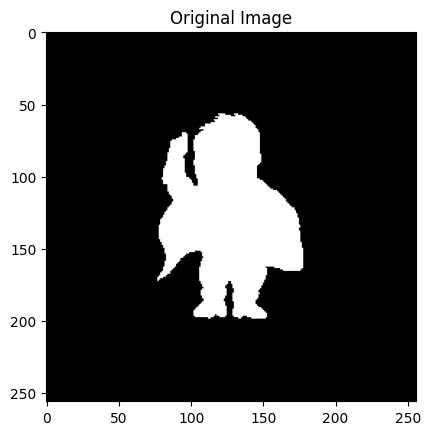

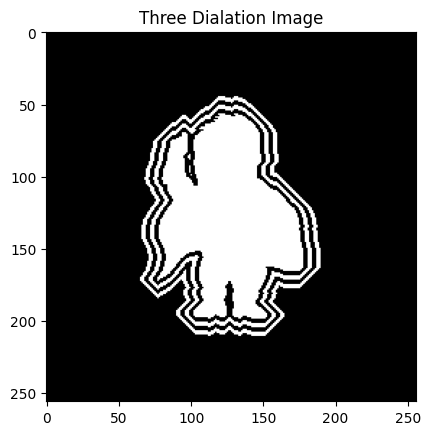

In [4]:
#  dialation example
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/alien73.png'
amg = imageio.imread(url,mode='F') < 100  #  set to 1 all of the pixels that originally have a value less than 100

print(amg[100,:])

bmg = nd.binary_dilation(amg, iterations=12) ^ nd.binary_dilation(amg, iterations=9)
cmg = nd.binary_dilation(amg, iterations=6) ^ nd.binary_dilation(amg, iterations=3)

dmg = amg + bmg ^ cmg

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

plt.title('Three Dialation Image')
plt.imshow(dmg, cmap='gray')
plt.show()


<br><br><br><br>

## Coordinate Mapping

<br>

<b>While scipy does have functions for shifting, rotation, and affine transformations, the creation of other types of transformations relies on two functions</b><br><br>

<b>The first is a function, perhaps user-defined, that creates a coordinate map</b><br><br>

<b>The second is scipy.ndimage.map_coordinates which receives input image data and an array containing new pixel locations</b><br><br>

<b>This moves the pixels in the input array to new locations defined by the mapping array</b><br><br>

<b>The idea is that each pixel in the input space is moved to a new location in the output space</b><br><br>

<b>In practice, though, this would leave some pixels in the output undefined</b><br><br>

<b>The function actually works in the reversed logic, where each pixel in the output space is mapped to the input space</b><br><br>

<b>Then the value of the pixel in the input is placed in the output space</b><br><br>

<b>In this manner, every pixel in the output space is defined as long as it mapped to a pixel that is within the frame of the input space</b><br><br>

<br><br>

<b>The Mapping operator is $C_{\bf M}$ where ${\bf M}$ is the array of new coordinates, thus an operation is described as</b><br><br>

${\bf b}[\vec x] = C_{\bf M} {\bf a}[\vec x]$

<b>Consider a case in which $M$ is of the size $2 \times V \times H$ which is basically two matrices of size $V \times H$</b><br><br>

<b>The value of the first matrix correspond to the row index</b><br><br>

<b>In other words, the values in the first row are zeros, the values in the second row are ones, and so forth</b><br><br>

<b>The second matrix has the same behavior along its columns</b><br><br>

<b>Thus, for any location $(v,h)$ the values of the two matrices are $v$ and $h$</b><br><br>

<b>The Python function that creates these matrices is numpy.indices indices</b><br><br>

<br><br>

<b>This version of $M$ will not alter the position of any pixel</b><br><br>

<b>Thus, the equation would produce an image ${\bf b}[\vec x]$ that is the same as the input image ${\bf a}[\vec x]$</b><br><br>

<b>Now, consider the task of creating an image such as the one in the example below</b><br><br>

<b>The pixel located at $(v,h)$ in the output obtains its value from a pixel located within a random distance $d$ from $(v,h)$</b><br><br>

<b>Using $\vec w$ to represent the size of the image and the random number operator ${\bf q}$, the generation of a new mapping matrix is</b><br><br>

${\bf M}^\prime = {\bf M} + 2 d {\bf q}_{\vec w} - d$

<b>The creation of the new image is then</b><br><br>

${\bf b}[\vec x] = C_{{\bf M}^\prime} {\bf a}[\vec x]$

<br><br>

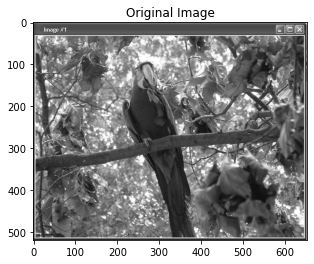

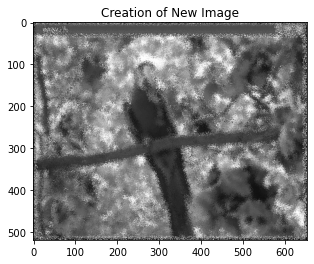

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url, as_gray=1)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

V,H = adata.shape
M = np.indices((V,H))  #  create the identity mapping
d = 5  #  establish the maximum travel distance
q = 2*d*np.random.ranf(M.shape) - d  #  define some random numbers
Mp = (M + q).astype(int)  #  define M' using random numbers
bdata = nd.map_coordinates(adata, Mp)  #  create the new image

plt.title('Creation of New Image')
plt.imshow(bdata, cmap='gray')
plt.show()

<br><br><br><br>

## Polar Transformations

<br>

<b>Arrays in Python contain information as rows and columns, however, there are some objects in images that are circular and angular in nature</b><br><br>

<b>Processing this information is easier in polar coordinates, but programming languages prefer rectilinear coordinates</b><br><br>

<b>Thus, in these cases it is useful to have functions that transform information between rectilinear and polar coordinates</b><br><br>

<b>Three such functions are presented here</b><br><br>

<b>The first is RPolar which maps a rectilinear image into a polar space and the second is IRPolar which performs the reverse transformation</b><br><br>

<b>The third is LogPolar which converts image data into a log-polar mapping space</b><br><br>

<b>This section will review the theory of these transformations, present the operator notation, present the Python scripts and finally incorporate one transformation into a simple transformation</b><br><br>

<br><br>

### Theory

<b>The following figure shows a single point with both the rectilinear coordinates $(i,j)$ and the polar coordinates $(r,\theta)$</b><br><br>

<b>The conversion from the rectilinear coordinates to the polar coordinates is</b><br><br>

$r = \sqrt{i^2 + j^2}$<br>
$\theta = \arctan ( j / i )$

<b>and the inverse transformation is</b><br><br>

$x = r \cos( \theta )$<br>
$y = r \sin ( \theta )$

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture_6_7_8_9/P2im2.png?raw=true" width="200"/img></div>
<br><br>

<b>The center of the coordinate space is in the interior of the image</b><br><br>

<b>The location of this center is defined by the user and is often placed at the center of the object that is begin analyzed</b><br><br>

<b>Therefore the operator notation also includes the location of the center as a vector $\vec v$ if it is not located at the center of the frame</b><br><br>

<br><br>

<b>The RPolar operator transforms image ${\bf a}[\vec x]$ by</b><br><br>

${\bf b}[\vec x] = \mathcal{P}_{\vec v} {\bf a}[\vec x]$

<b>The reverse operator is the IRPolar operator which is represented by $\mathcal{P}^{-1}$ as in</b><br><br>

${\bf c}[\vec x] = \mathcal{P}^{-1}_{\vec v} {\bf b}[\vec x]$

<b>In theory, ${\bf c}[\vec x] = {\bf a}[\vec x]$, but in practice there will be small errors since the images are pixelated</b><br><br>

<b>The final operator in this family is the LogPolar operator which converts the rectilinear image into a log-polar image</b><br><br>

<b>This is used to also zoom in on the details near the center of the transformation at the sacrifice of the spatial resolution for points far away from the center</b><br><br>

<b>It is represented as</b><br><br>

${\bf b}[\vec x] = \mathcal{P}_{L; \vec w} {\bf a}[\vec x]$

<br><br>

### Python Implementation

<br><br>

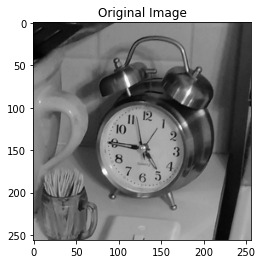

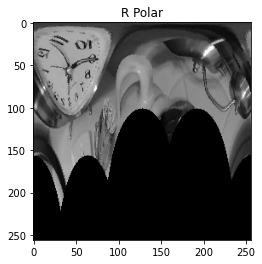

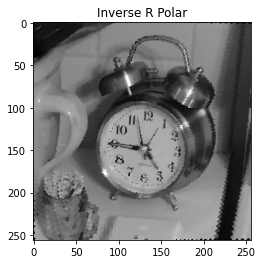

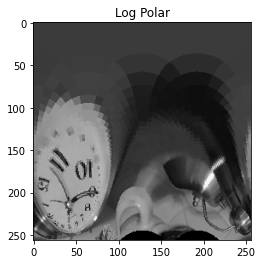

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

# RPolar defined as follows
def RPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    y = ndx[0] * np.cos(a)
    x = ndx[0] * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

# IRPolar defined as follows
def IRPolar(rpdata, pxy):
    ndx = np.indices(rpdata.shape)
    ndx[0] -= pxy[0]
    ndx[1] -= pxy[1]
    v,h = rpdata.shape
    r = np.sqrt(ndx[0]**2 + ndx[1]**2)
    theta = np.arctan2(-ndx[0], -ndx[1] )/2/np.pi*h
    ndx[0] = r.astype(int)
    ndx[1] = theta.astype(int) + h/2
    answ = nd.map_coordinates(rpdata, ndx)
    answ[pxy[0],pxy[1]:] = answ[pxy[0]-1,pxy[1]:]
    return answ

# LogPolar defined as follows
def LogPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    r = np.exp( ndx[0]/v * np.log(v/2))-1.0
    y = r * np.cos(a)
    x = r * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/clock.png'
adata = imageio.imread(url,as_gray=True)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

# transforms around the same point
RPimg = RPolar(adata, (100, 100))
plt.title('R Polar')
plt.imshow(RPimg, cmap='gray')
plt.show()

IRPimg = IRPolar(RPimg, (100, 100))
plt.title('Inverse R Polar')
plt.imshow(IRPimg, cmap='gray')
plt.show()

LPimg = LogPolar(adata, (100, 100))
plt.title('Log Polar')
plt.imshow(LPimg, cmap='gray')
plt.show()


<br><br><br><br>

## Pincushion and Barrel Transforms

<br>

<b>Pincushion and barrel transforms alter the radial distance to points in a non-linear fashion</b><br><br>

<b>These two transformations are actually the same operator, but with a different bending parameter</b><br><br>

<b>The bending process for a single pixel is described by</b><br><br>

$r^\prime = \frac{ r^\beta}{V^{\beta-1}}$

<b>where $\beta$ is the bend parameter, $r$ is the radial distance, and $V$ is the vertical dimension of the image</b><br><br>

<b>The barrel transform appears to enlarge the pixels in the center of the image at the sacrifice of the resolution at the outer portions of the image</b><br><br>

<b>To accomplish this $\beta > 1$</b><br><br>

<b>The pincushion transform shrinks the center of the image while enlarging the outer portions</b><br><br>

<b>This is accomplished with $0 < \beta < 1$</b><br><br>

<b>The notation is rather simple</b><br><br>

<b>Given a gray scale input ${\bf a}[\vec x]$ the notation is</b><br><br>

${\bf b}[\vec x] = B_{\beta,\vec v} {\bf a}[\vec x]$

<b>where $\beta$ is the bending factor and $\vec v$ is the center of transformation</b><br><br>

<br><br>

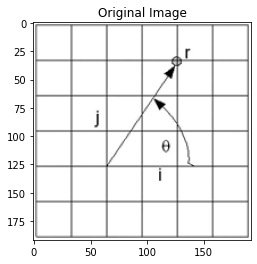

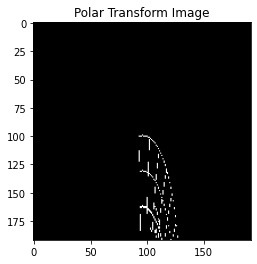

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

def RPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    y = ndx[0] * np.cos(a)
    x = ndx[0] * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/P2im2.png'
amg = imageio.imread(url)

a = amg[:,:,2]/(amg[:,:,0]+40.)
rp = RPolar((a<0.83)+0.0,(178,288))

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

plt.title('Polar Transform Image')
plt.imshow(rp, cmap='gray')
plt.show()

(192, 192)


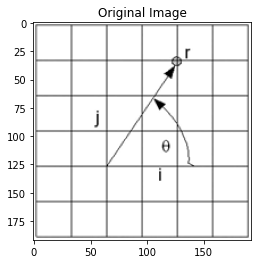

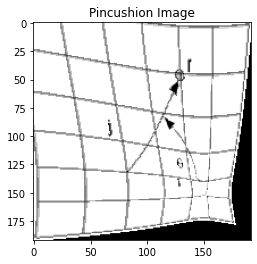

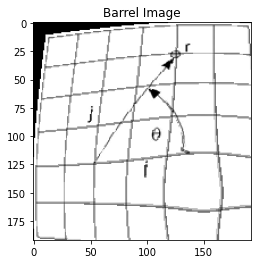

In [ ]:
#  pincushion and barrel transformation
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

def Bend(data, bend, cvh):
    cv,ch = cvh
    a = np.indices(data.shape)
    V,H = data.shape
    a[0],a[1] = cv-a[0],a[1]-ch
    r = np.sqrt(a[0]*a[0] + a[1]*a[1])
    t = np.arctan2(a[0], a[1])
    r = (r ** bend)/(cv**(bend-1))
    x = r* np.cos(t); y = r* np.sin(t)
    x = x + ch; y = cv - y
    coords = np.array([y.astype(int),x.astype(int)])
    z = nd.map_coordinates(data, coords)
    return z

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/P2im2.png'
amg = imageio.imread(url, as_gray=True)
print(amg.shape)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

b = Bend(amg, 0.7, (150, 150))
plt.title('Pincushion Image')
plt.imshow(b, cmap='gray')
plt.show()

b = Bend(amg, 1.3, (150, 150))
plt.title('Barrel Image')
plt.imshow(b, cmap='gray')
plt.show()

<br><br><br><br>

## Other Transformations

<br>

<b>The radial-polar and bend transformations are a subset of the geometric operators which map pixels to new locations</b><br><br>

<b>There are a wide range of functions that fall into this category</b><br><br>

<b>This section reviews methods by which the user defines the mapping function</b><br><br>

<br><br>

### Generic Transformations

<br>

<b>Of course, it is not possible to conceive of every possible geometric transformation and assign a unique operator symbol to it</b><br><br>

<b>So the generic operator, $F$, is available for used defined functions as in</b><br><br>

${\bf b}[\vec x] =  F {\bf a}[\vec x]$

<b>The scipy.ndimage module also offers a generic transform function named geometric_transform which maps pixels from one space to another according to a user-defined function</b><br><br>

<b>Consider an altered bird image</b><br><br>

<b>In this example, the pixels are moved according to cosine functions in both the vertical and horizontal dimensions </b><br><br>

<br><br>

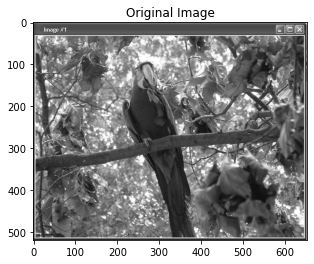

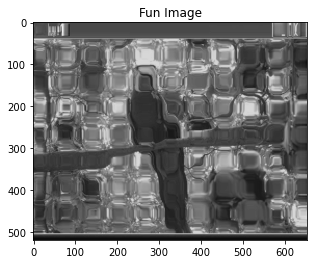

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

def GeoFun(outcoord):
    a = 10*np.cos(outcoord[0]/10.)+outcoord[0]
    b = 10*np.cos(outcoord[1]/10.)+outcoord[1]
    return a,b

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url, as_gray=1)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

bmg = nd.geometric_transform(adata, GeoFun)
plt.title('Fun Image')
plt.imshow(bmg, cmap='gray')
plt.show()

<br><br><br><br>

### Affine Transformation

<b>The Rotation operator multiplied the vector representing the coordinate by a matrix</b><br><br>

<b>The affine transformation is quite similar but user defines the matrix</b><br><br>

<b>The example below creates a matrix mat which is altered from the rotation matrix, and the affine_transform function is then called that maps the coordinates according to this prescription</b><br><br>

<br><br>

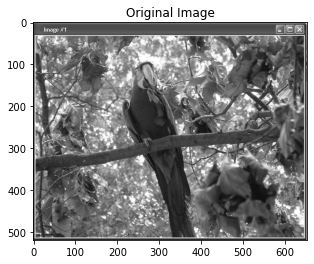

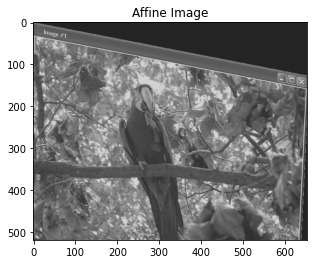

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

def AffineExample(data):
    theta = 11 * np.pi/180 # 11 degrees in radians
    mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta/4), np.cos(theta)]])
    data2 = nd.affine_transform(data, mat)
    return data2

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url, as_gray=1)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

mg2 = AffineExample(adata)

plt.title('Affine Image')
plt.imshow(mg2, cmap='gray')
plt.show()


<br><br><br><br><br><br><br><br><br><br><br><br>

## Summary

<br>

<b>The family of geometric operators are dedicated to moving pixels to new locations within the image rather than the alteration of intensities</b><br><br>

<b>Simple operations including shifting or rotating the image</b><br><br>

<b>Erosion and dilation operators change the perimeter of shapes within an image</b><br><br>

<b>More complicated operations require a re-mapping of the image pixels</b><br><br>

<b>These include transformations to radial-polar space, bending, and other morphological functions</b><br><br>

<br><br><br><br>


# Homework 4

<br>
<b>Due by next class to be submitted on Blackboard.<br><br>
    
1. With an image of your choosing, write a script to shift a grayscale image 10 pixels to the right.<br><br>

2.  Write a script that will rotate the color image of the bird $45^\circ$ counter clockwise with no reshaping.  What is the shape of the new image?<br><br>

3.  Repeat the processing in #2.  This time with reshaping.  What is the shape of the resulting image?  Why is there a difference?<br><br>

4.  Using the alien image from the binary dialation example, perform a binary erosion.  Use the same iterations as done earlier to create bmg and cmg.  Create a new image, dmg, based on adding the original image with bmg and subtracting cmg.  Subtract the original image from dmg.  Show all resulting images.<br><br>

5.   Using the clock image and code for the rpolar, irpolar and log polar plots, shift the center of rotation to (200, 200).  Describe your interpretation of the results.  Describe what happends if we shift the center of rotation to (400,400).<br><br>

6.  Create an image with an affine transformation of 45 degrees and 90 degrees.  Explain the 90 degree result.<br><br>
</b>